### Importing Libraries

In [2]:
import cv2
import os
import numpy as np
import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization, concatenate
from keras.layers import Input, Conv2D,MaxPooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.densenet import DenseNet121
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Data Preprocessing

In [4]:
# def split_data(data_path):
#     train_data_dir =  data_path + '/train' 
#     val_data_dir =  data_path + '/val'
    
#     train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#       train_data_dir,
#       seed=123,
#       image_size=(img_height, img_width),
#       batch_size=batch_size
#       )
    
#     val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#       val_data_dir,
#       seed=123,
#       image_size=(img_height, img_width),
#       batch_size=batch_size
#       )

#     return train_ds, val_ds

# train_ds, val_ds, test_ds = split_data('Dataset')


# train_class_names = train_ds.class_names
# val_class_names = val_ds.class_names
# print(train_class_names)
# print(val_class_names)

In [5]:
data_path ='Dataset/train'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print("Dictionary:", label_dict)
print("Categories:", categories)
print("Labels:", labels)

Dictionary: {'Stage_0': 0, 'Stage_1': 1, 'Stage_2': 2, 'Stage_3': 3, 'Stage_4': 4}
Categories: ['Stage_0', 'Stage_1', 'Stage_2', 'Stage_3', 'Stage_4']
Labels: [0, 1, 2, 3, 4]


In [6]:
img_size=224  #256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        img=np.array(img, dtype=np.uint8)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [7]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

new_label=np_utils.to_categorical(label)

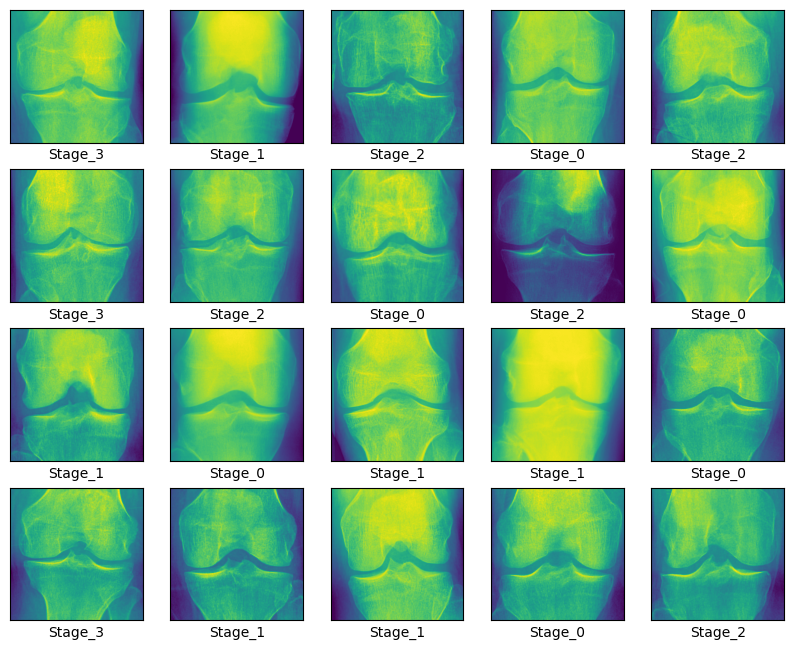

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

### Model Building

Model 1

In [7]:
model1=Sequential()

model1.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dropout(0.2))

model1.add(Dense(128,activation='relu'))

model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))

model1.add(Dense(5,activation='softmax')) # Output Layer

# Compile the Model1
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2024-04-10 11:43:19.700518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 11:43:19.707536: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 11:43:19.707789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 11:43:19.707947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     1280      
                                                                 
 activation (Activation)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [9]:
history1=model1.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100


2024-04-10 11:43:27.179380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-04-10 11:43:29.764237: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-10 11:43:32.298787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-10 11:43:32.335244: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x221a8f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-10 11:43:32.335314: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-04-10 11:43:32.369671: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-10 11:43:32.710407: I tensor

202/202 [==============================] - 26s 74ms/step - loss: 1.4242 - accuracy: 0.3944 - val_loss: 1.4201 - val_accuracy: 0.3831
Epoch 2/100
202/202 [==============================] - 13s 67ms/step - loss: 1.4027 - accuracy: 0.3973 - val_loss: 1.4217 - val_accuracy: 0.3831
Epoch 3/100
202/202 [==============================] - 13s 67ms/step - loss: 1.4014 - accuracy: 0.3973 - val_loss: 1.4177 - val_accuracy: 0.3831
Epoch 4/100
202/202 [==============================] - 13s 66ms/step - loss: 1.3986 - accuracy: 0.3973 - val_loss: 1.4166 - val_accuracy: 0.3862
Epoch 5/100
202/202 [==============================] - 14s 67ms/step - loss: 1.3877 - accuracy: 0.3979 - val_loss: 1.4106 - val_accuracy: 0.3831
Epoch 6/100
202/202 [==============================] - 13s 66ms/step - loss: 1.3685 - accuracy: 0.4010 - val_loss: 1.3600 - val_accuracy: 0.3924
Epoch 7/100
202/202 [==============================] - 13s 66ms/step - loss: 1.3515 - accuracy: 0.4091 - val_loss: 1.3508 - val_accuracy: 0.39

202/202 [==============================] - 13s 66ms/step - loss: 0.5686 - accuracy: 0.7707 - val_loss: 1.3509 - val_accuracy: 0.5201
Epoch 58/100
202/202 [==============================] - 13s 66ms/step - loss: 0.5454 - accuracy: 0.7776 - val_loss: 1.3805 - val_accuracy: 0.5251
Epoch 59/100
202/202 [==============================] - 13s 65ms/step - loss: 0.5528 - accuracy: 0.7779 - val_loss: 1.3847 - val_accuracy: 0.5189
Epoch 60/100
202/202 [==============================] - 13s 65ms/step - loss: 0.5354 - accuracy: 0.7810 - val_loss: 1.4266 - val_accuracy: 0.5220
Epoch 61/100
202/202 [==============================] - 13s 65ms/step - loss: 0.5183 - accuracy: 0.7895 - val_loss: 1.3026 - val_accuracy: 0.5220
Epoch 62/100
202/202 [==============================] - 13s 65ms/step - loss: 0.5036 - accuracy: 0.7982 - val_loss: 1.4895 - val_accuracy: 0.5102
Epoch 63/100
202/202 [==============================] - 13s 65ms/step - loss: 0.4960 - accuracy: 0.8008 - val_loss: 1.4602 - val_accuracy

Model 2


In [10]:
def resnet_block(inputs, filters, kernel_size, strides=(1, 1), activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size=kernel_size, strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    if strides != (1, 1):
        inputs = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
    x = keras.layers.add([x, inputs])
    x = Activation(activation)(x)
    return x

def create_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = resnet_block(x, filters=64, kernel_size=(3, 3))
    x = resnet_block(x, filters=64, kernel_size=(3, 3))
    # x = resnet_block(x, filters=64, kernel_size=(3, 3))

    x = resnet_block(x, filters=128, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=128, kernel_size=(3, 3))
    # x = resnet_block(x, filters=128, kernel_size=(3, 3))
    # x = resnet_block(x, filters=128, kernel_size=(3, 3))

    x = resnet_block(x, filters=256, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=256, kernel_size=(3, 3))
    x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))

    x = resnet_block(x, filters=512, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=512, kernel_size=(3, 3))
    # x = resnet_block(x, filters=512, kernel_size=(3, 3))
    x = AveragePooling2D(pool_size=(7, 7))(x)

    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model2 = Model(inputs=inputs, outputs=x)
    return model2

# Define the input shape and number of classes
input_shape = data.shape[1:]
num_classes = 5

# Create the ResNet model
model2 = create_resnet(input_shape, num_classes)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 64  3200        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d_3[0][0]']               
 alization)                     )                                                             

 conv2d_12 (Conv2D)             (None, 28, 28, 128)  147584      ['activation_13[0][0]']          
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 28, 28, 128)  512        ['conv2d_12[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 activation_14 (Activation)     (None, 28, 28, 128)  0           ['batch_normalization_8[0][0]']  
                                                                                                  
 add_3 (Add)                    (None, 28, 28, 128)  0           ['activation_14[0][0]',          
                                                                  'activation_12[0][0]']          
                                                                                                  
 activatio

 activation_26 (Activation)     (None, 7, 7, 512)    0           ['batch_normalization_16[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 7, 7, 512)    131584      ['activation_24[0][0]']          
                                                                                                  
 add_7 (Add)                    (None, 7, 7, 512)    0           ['activation_26[0][0]',          
                                                                  'conv2d_22[0][0]']              
                                                                                                  
 activation_27 (Activation)     (None, 7, 7, 512)    0           ['add_7[0][0]']                  
                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 512)    2359808     ['activation_27[0][0]']          
          

In [11]:
history2=model2.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100
202/202 [==============================] - 31s 81ms/step - loss: 1.5989 - accuracy: 0.3703 - val_loss: 1.4284 - val_accuracy: 0.3831
Epoch 2/100
202/202 [==============================] - 15s 76ms/step - loss: 1.4258 - accuracy: 0.3880 - val_loss: 1.4145 - val_accuracy: 0.3831
Epoch 3/100
202/202 [==============================] - 16s 77ms/step - loss: 1.4102 - accuracy: 0.3930 - val_loss: 1.4185 - val_accuracy: 0.3763
Epoch 4/100
202/202 [==============================] - 15s 76ms/step - loss: 1.3947 - accuracy: 0.4002 - val_loss: 2.2957 - val_accuracy: 0.3825
Epoch 5/100
202/202 [==============================] - 15s 76ms/step - loss: 1.3792 - accuracy: 0.4063 - val_loss: 1.7561 - val_accuracy: 0.3211
Epoch 6/100
202/202 [==============================] - 15s 76ms/step - loss: 1.3436 - accuracy: 0.4209 - val_loss: 1.4299 - val_accuracy: 0.3608
Epoch 7/100
202/202 [==============================] - 15s 76ms/step - loss: 1.2899 - accuracy: 0.4390 - val_loss: 1.5149 - val_ac

202/202 [==============================] - 15s 76ms/step - loss: 0.0619 - accuracy: 0.9777 - val_loss: 2.7701 - val_accuracy: 0.5480
Epoch 58/100
202/202 [==============================] - 15s 75ms/step - loss: 0.0543 - accuracy: 0.9805 - val_loss: 2.9855 - val_accuracy: 0.5437
Epoch 59/100
202/202 [==============================] - 15s 75ms/step - loss: 0.0377 - accuracy: 0.9859 - val_loss: 2.5073 - val_accuracy: 0.5673
Epoch 60/100
202/202 [==============================] - 15s 76ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 2.8297 - val_accuracy: 0.5666
Epoch 61/100
202/202 [==============================] - 15s 76ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 2.8865 - val_accuracy: 0.5580
Epoch 62/100
202/202 [==============================] - 15s 75ms/step - loss: 0.0276 - accuracy: 0.9901 - val_loss: 3.0946 - val_accuracy: 0.5852
Epoch 63/100
202/202 [==============================] - 15s 75ms/step - loss: 0.0381 - accuracy: 0.9864 - val_loss: 3.1853 - val_accuracy

Model 3

In [12]:
# Define the CNN model
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=data.shape[1:]))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model3.add(Flatten())

# Fully connected layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(5, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [13]:
history3=model3.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100
202/202 [==============================] - 11s 41ms/step - loss: 1.4393 - accuracy: 0.3810 - val_loss: 1.4202 - val_accuracy: 0.3869
Epoch 2/100
202/202 [==============================] - 7s 36ms/step - loss: 1.4055 - accuracy: 0.3947 - val_loss: 1.4313 - val_accuracy: 0.3831
Epoch 3/100
202/202 [==============================] - 7s 36ms/step - loss: 1.3933 - accuracy: 0.3965 - val_loss: 1.3896 - val_accuracy: 0.3881
Epoch 4/100
202/202 [==============================] - 7s 36ms/step - loss: 1.3756 - accuracy: 0.4032 - val_loss: 1.3700 - val_accuracy: 0.4005
Epoch 5/100
202/202 [==============================] - 7s 35ms/step - loss: 1.3507 - accuracy: 0.4128 - val_loss: 1.3570 - val_accuracy: 0.4048
Epoch 6/100
202/202 [==============================] - 7s 36ms/step - loss: 1.3329 - accuracy: 0.4199 - val_loss: 1.3221 - val_accuracy: 0.4030
Epoch 7/100
202/202 [==============================] - 7s 36ms/step - loss: 1.3104 - accuracy: 0.4299 - val_loss: 1.3219 - val_accuracy

202/202 [==============================] - 7s 35ms/step - loss: 0.1582 - accuracy: 0.9403 - val_loss: 2.9087 - val_accuracy: 0.5226
Epoch 58/100
202/202 [==============================] - 7s 35ms/step - loss: 0.1467 - accuracy: 0.9433 - val_loss: 3.3613 - val_accuracy: 0.5232
Epoch 59/100
202/202 [==============================] - 7s 36ms/step - loss: 0.1422 - accuracy: 0.9420 - val_loss: 3.2207 - val_accuracy: 0.5375
Epoch 60/100
202/202 [==============================] - 7s 35ms/step - loss: 0.1701 - accuracy: 0.9354 - val_loss: 3.1755 - val_accuracy: 0.5239
Epoch 61/100
202/202 [==============================] - 7s 36ms/step - loss: 0.1517 - accuracy: 0.9408 - val_loss: 3.2766 - val_accuracy: 0.5356
Epoch 62/100
202/202 [==============================] - 7s 36ms/step - loss: 0.1638 - accuracy: 0.9405 - val_loss: 3.3917 - val_accuracy: 0.5232
Epoch 63/100
202/202 [==============================] - 7s 35ms/step - loss: 0.1471 - accuracy: 0.9450 - val_loss: 3.4791 - val_accuracy: 0.527

Model - 4

In [11]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from keras.optimizers import Adam

def unet(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)

    model4 = Model(inputs=inputs, outputs=outputs)
    model4.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    return model4

# Define the input shape and number of classes
input_shape = data.shape[1:]
num_classes = 5

# Create the UNet model
model4 = unet(input_shape, num_classes)

# Print the model summary
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 224, 224, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 224, 224, 64  36928       ['conv2d_23[0][0]']              
                                )                                                           

C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
history4=model4.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100


ValueError: in user code:

    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\tanus\AppData\Roaming\Python\Python311\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 224, 224, 5) are incompatible


Model 5

In [12]:
# Define the input shape
input_shape = data.shape[1:]

# Define the InceptionNet architecture
def create_inception_net(input_shape, num_classes):
    # Stem
    input_layer = Input(shape=input_shape)
    conv1 = Conv2D(64, (7, 7), strides=(2, 2), activation='relu', padding='same')(input_layer)
    pool1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(conv1)
    
    # Inception blocks
    inception1 = inception_block(pool1, [64, 96, 128, 16, 32, 32])
    inception2 = inception_block(inception1, [128, 128, 192, 32, 96, 64])
    inception3 = inception_block(inception2, [192, 96, 208, 16, 48, 64])
    inception4 = inception_block(inception3, [160, 112, 224, 24, 64, 64])
    inception5 = inception_block(inception4, [128, 128, 256, 24, 64, 64])
    inception6 = inception_block(inception5, [112, 144, 288, 32, 64, 64])
    inception7 = inception_block(inception6, [256, 160, 320, 32, 128, 128])
    inception8 = inception_block(inception7, [256, 160, 320, 32, 128, 128])
    inception9 = inception_block(inception8, [384, 192, 384, 48, 128, 128])
    
    # Classifier
    flatten = Flatten()(inception9)
    dense1 = Dense(512, activation='relu')(flatten)
    output_layer = Dense(num_classes, activation='softmax')(dense1)
    
    # Create the model
    model5 = Model(inputs=input_layer, outputs=output_layer)
    
    return model5

# Inception block
def inception_block(input_layer, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), activation='relu')(input_layer)
    
    conv3x3 = Conv2D(filters[1], (3, 3), activation='relu', padding='same')(input_layer)
    
    conv5x5 = Conv2D(filters[2], (5, 5), activation='relu', padding='same')(input_layer)
    
    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
    conv1x1_pool = Conv2D(filters[3], (1, 1), activation='relu')(maxpool)
    
    concatenated = concatenate([conv1x1, conv3x3, conv5x5, conv1x1_pool], axis=-1)
    
    return concatenated

# Define the number of classes
num_classes = 5

# Create the InceptionNet model
model5 = create_inception_net(input_shape, num_classes)

# Compile the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model5.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 112, 112, 64  3200        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_46[0][0]']              
                                                                                            

In [13]:
history5=model5.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100
